# Prueba el modelo reentrenado con 'Transfer Learning con TF-Hub' para reconocer los Tipos de Flores Iris 

0) Instalar el paquete:

In [1]:
#@title Instalar paquete

# Luego de instalar el paquete tal vez necesario reiniciar el entorno (ver mensajes que genera)
try:
  # %tensorflow_version only exists in Colab.
  !pip install -q tf-nightly
except Exception:
  pass

!pip install -q -U tf-hub-nightly
!pip install -q tfds-nightly

     |████████████████████████████████| 397.6MB 40kB/s 
     |████████████████████████████████| 471kB 45.1MB/s 
     |████████████████████████████████| 3.8MB 45.7MB/s 
     |████████████████████████████████| 11.9MB 45.1MB/s 
     |████████████████████████████████| 14.5MB 356kB/s 
     |████████████████████████████████| 1.3MB 39.5MB/s 
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 112kB 5.4MB/s 
     |████████████████████████████████| 3.7MB 6.6MB/s 


1) Importar librerías:

In [8]:
#@title Librerías a usar

# For running inference on the TF-Hub module.
import tensorflow as tf
import tensorflow_hub as hub

# For downloading the image.
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras import layers
from keras.preprocessing import image
from IPython.display import Image

from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import csv
import os

print("\nLibrerías importadas")


Librerías importadas


2) Montar el Drive:

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

# directorio local en Google Drive
path = 'gdrive/My Drive/IA/demo ANIMALES/'  #@param {type:"string"}

model_export_path = path + '/Model_TFHub'
imagPath = path + '/imagenes/test'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


2) Cargar el modelo ya reentrenado:

In [6]:
#@title Cargar modelo re-entrenado

# importa el modelo reentrenado
classifier = tf.keras.models.load_model(model_export_path)
print("\nModelo recuperado de ", model_export_path)

# define el tamaño de imágenes soportadas
with open( model_export_path + '/imagshape.csv', mode='r') as csvfile:
    aux_imShape = list(csv.reader(csvfile))[0]
IMAGE_SHAPE = [ int(aux_imShape[0]), int(aux_imShape[1]) ] 
print('Tamaño de imágenes: ', IMAGE_SHAPE, ' recuperada')

# importa definición de las clases
with open( model_export_path + '/clases.csv', mode='r') as csvfile:
    all_classes = list(csv.reader(csvfile))[0]
print('Definición de las clases: ', all_classes, ' recuperada')



Modelo recuperado de  gdrive/My Drive/IA/demo ANIMALES//Model_TFHub
Tamaño de imágenes:  [299, 299]  recuperada
Definición de las clases:  ['Ave', 'Insecto', 'Invertebrado', 'Mamifero', 'Pez', 'Reptil']  recuperada


3) Ejecutar el nuevo modelo re-entrenado sobre las imágenes y mostrar estadísticas:


--- Procesando  invertebrado


>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/invertebrado/i_caracol.png :  invertebrado[0.33973116]


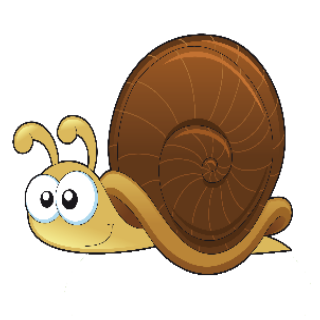

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/invertebrado/i_pulpo.png :  invertebrado[0.71965563]


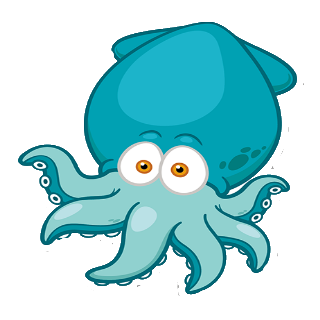

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/invertebrado/i_babosa.png :  invertebrado[0.8788209]


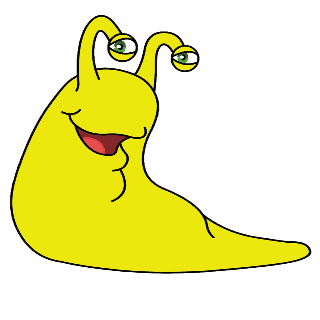

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/invertebrado/da_invertebrado_0_8795737.png :  invertebrado[0.67445475]


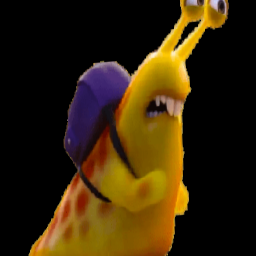

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/invertebrado/da_invertebrado_3_8898966.png :  invertebrado[0.8362033]


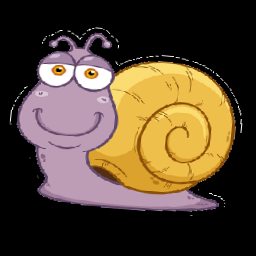

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/invertebrado/da_invertebrado_6_6747848.png :  invertebrado[0.9636181]


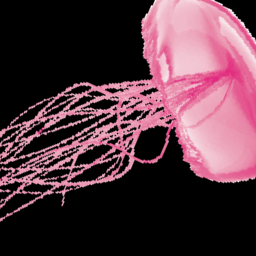

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/invertebrado/da_invertebrado_2_9702104.png :  invertebrado[0.79053867]


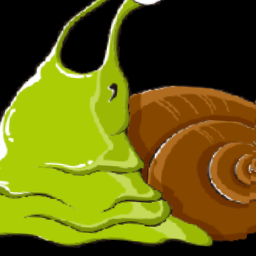

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/invertebrado/da_invertebrado_4_8457141.png :  invertebrado[0.9432296]


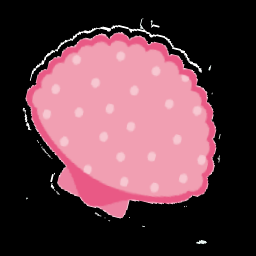

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/invertebrado/da_invertebrado_1_597043.png :  invertebrado[0.87229073]


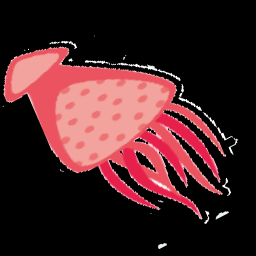

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/invertebrado/da_invertebrado_5_9270143.png :  invertebrado[0.89343655]


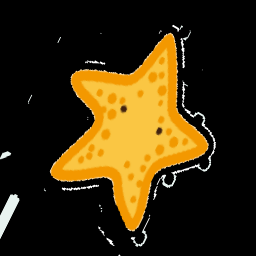


TOTAL CLASS invertebrado :  10 : Detectado OK  10 imágenes - Detectado con Error  0 imágenes.
con una Exactitud de 1.000000

--------------------------------------------------------------------------------------------------------------- 

--- Procesando  mamifero


>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/mamifero/m_beluga.png :  mamifero[0.63758457]


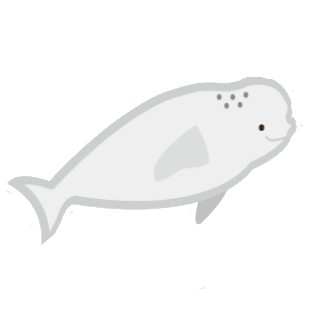

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/mamifero/m_mono.png :  mamifero[0.754003]


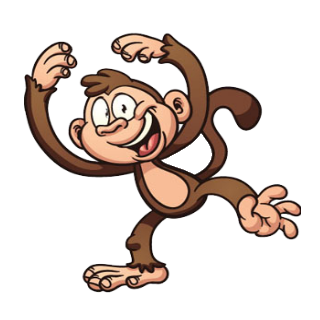

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/mamifero/m_panda.png :  mamifero[0.72230613]


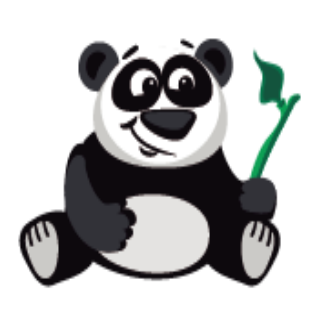

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/mamifero/da_mamifero_0_275087.png :  mamifero[0.6685858]


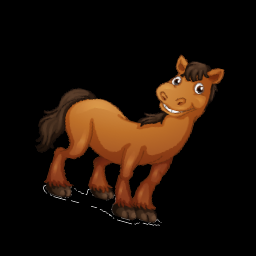

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/mamifero/da_mamifero_1_8836011.png :  mamifero[0.6977019]


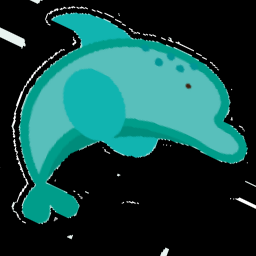

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/mamifero/da_mamifero_5_6694852.png :  mamifero[0.7311551]


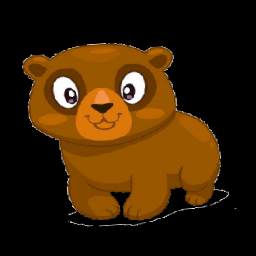

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/mamifero/da_mamifero_2_1399058.png :  mamifero[0.91244966]


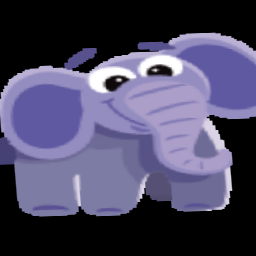

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/mamifero/da_mamifero_6_8016515.png :  mamifero[0.8416768]


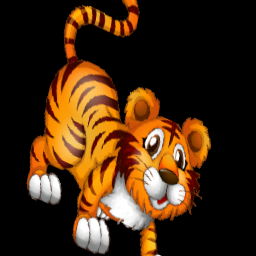

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/mamifero/da_mamifero_3_7772906.png :  mamifero[0.72702533]


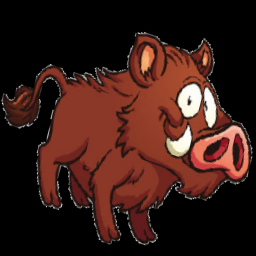

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/mamifero/da_mamifero_4_1653072.png :  mamifero[0.92914695]


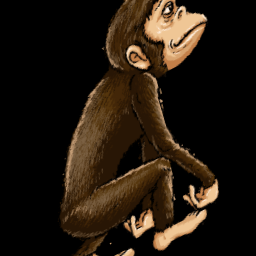


TOTAL CLASS mamifero :  10 : Detectado OK  10 imágenes - Detectado con Error  0 imágenes.
con una Exactitud de 1.000000

--------------------------------------------------------------------------------------------------------------- 

--- Procesando  reptil


>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/reptil/r_cocodrilo.png :  reptil[0.4617452]


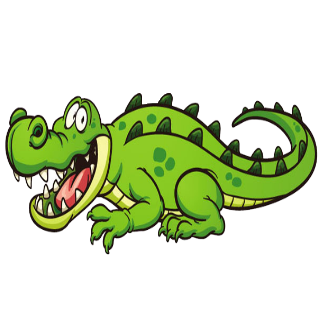

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/reptil/r_dinosaurio.png :  reptil[0.85952103]


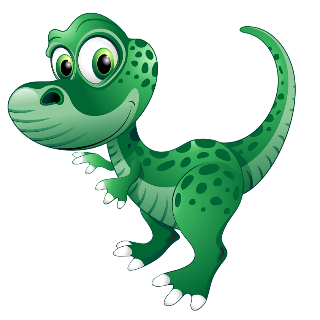

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/reptil/r_serpiente.png :  reptil[0.4447462]


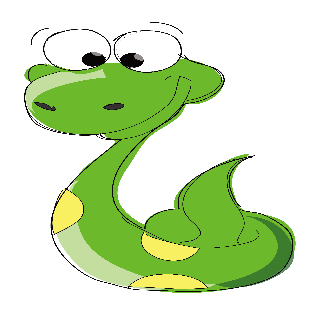

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/reptil/da_reptil_5_6812300.png :  reptil[0.92672896]


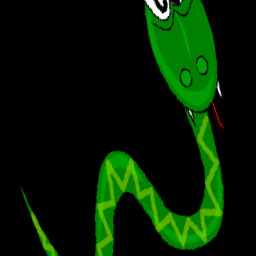

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/reptil/da_reptil_3_1636758.png :  reptil[0.93445176]


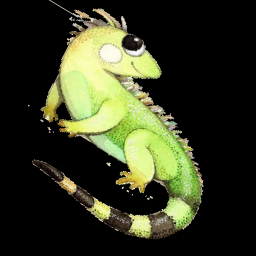

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/reptil/da_reptil_0_337371.png :  reptil[0.77454895]


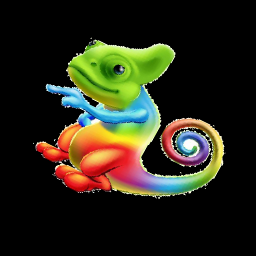

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/reptil/da_reptil_4_530992.png :  reptil[0.9373844]


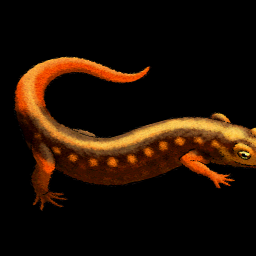

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/reptil/da_reptil_1_9567082.png :  reptil[0.8965722]


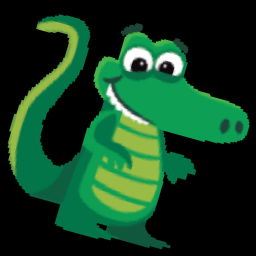

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/reptil/da_reptil_6_4229104.png :  reptil[0.82971764]


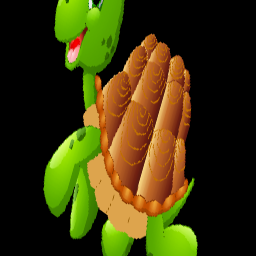

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/reptil/da_reptil_2_9939444.png :  reptil[0.8386247]


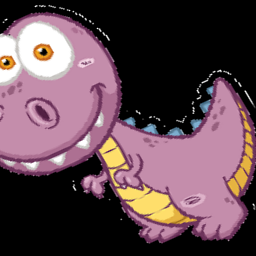


TOTAL CLASS reptil :  10 : Detectado OK  10 imágenes - Detectado con Error  0 imágenes.
con una Exactitud de 1.000000

--------------------------------------------------------------------------------------------------------------- 

--- Procesando  insecto


>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/insecto/s_abeja.png :  insecto[0.4130116]


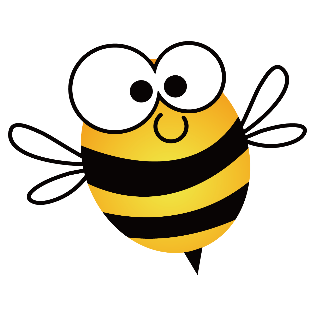

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/insecto/s_cucaracha.png :  insecto[0.28502277]


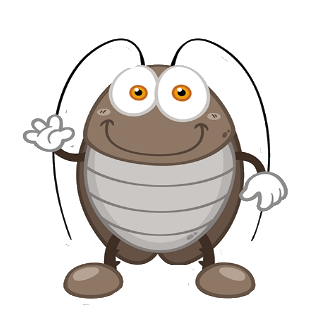

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/insecto/s_hormiga.png :  insecto[0.65273136]


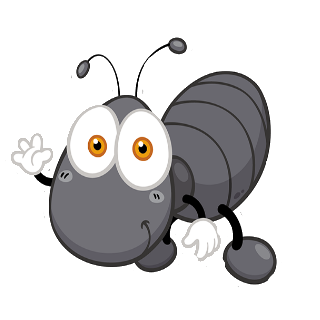

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/insecto/da_insecto_0_4387467.png :  insecto[0.8832116]


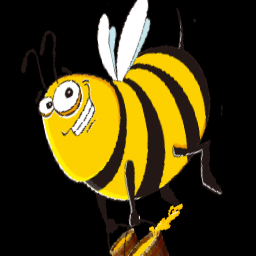

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/insecto/da_insecto_3_1802678.png :  insecto[0.7518846]


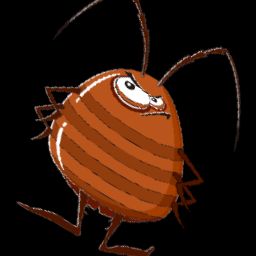

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/insecto/da_insecto_2_9697211.png :  insecto[0.73053044]


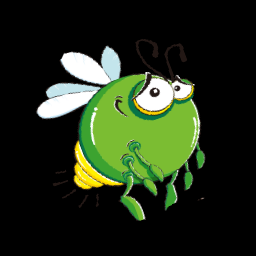

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/insecto/da_insecto_1_726366.png :  insecto[0.89234084]


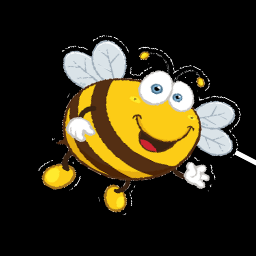

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/insecto/da_insecto_4_6378021.png :  insecto[0.9186276]


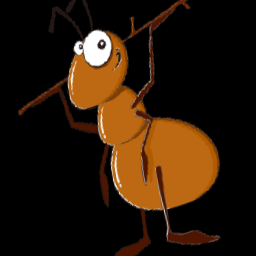

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/insecto/da_insecto_5_7711525.png :  insecto[0.7567178]


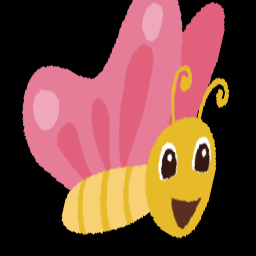

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/insecto/da_insecto_6_2514985.png :  insecto[0.88121563]


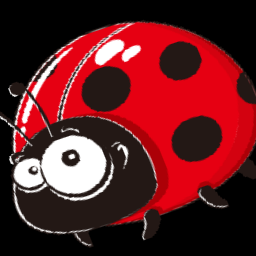


TOTAL CLASS insecto :  10 : Detectado OK  10 imágenes - Detectado con Error  0 imágenes.
con una Exactitud de 1.000000

--------------------------------------------------------------------------------------------------------------- 

--- Procesando  ave


>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/ave/a_buho.png :  ave[0.667063]


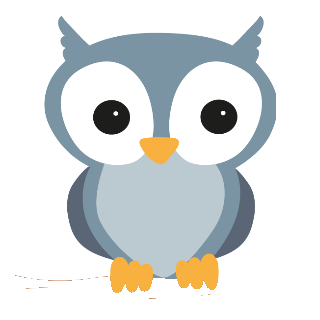

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/ave/a_pajaro.png :  ave[0.63241184]


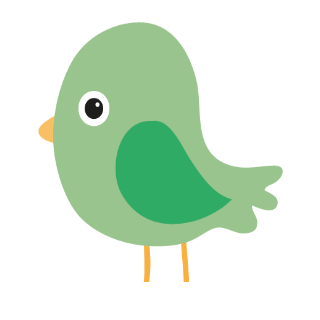

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/ave/a_tucan.png :  ave[0.80557424]


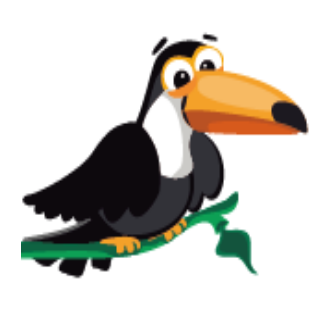

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/ave/da_ave_4_6759311.png :  ave[0.75687563]


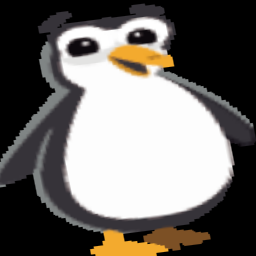

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/ave/da_ave_3_5683395.png :  ave[0.9346546]


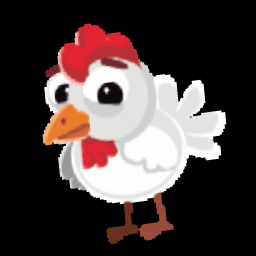

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/ave/da_ave_6_5197877.png :  ave[0.57856286]


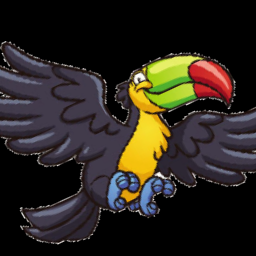

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/ave/da_ave_0_6128875.png :  ave[0.7354686]


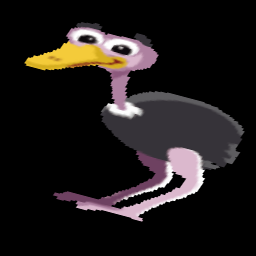

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/ave/da_ave_1_9620250.png :  ave[0.48395407]


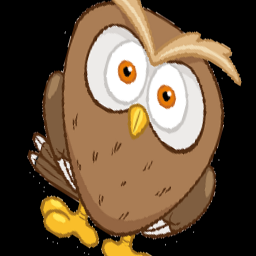

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/ave/da_ave_2_2454754.png :  ave[0.8838468]


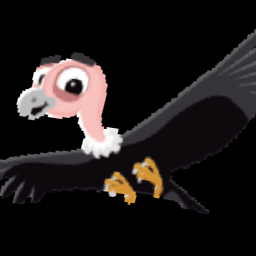

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/ave/da_ave_5_5112438.png :  ave[0.6657736]


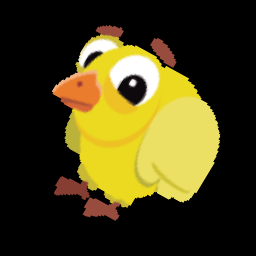


TOTAL CLASS ave :  10 : Detectado OK  10 imágenes - Detectado con Error  0 imágenes.
con una Exactitud de 1.000000

--------------------------------------------------------------------------------------------------------------- 

--- Procesando  pez


>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/pez/p_atun.png :  pez[0.903668]


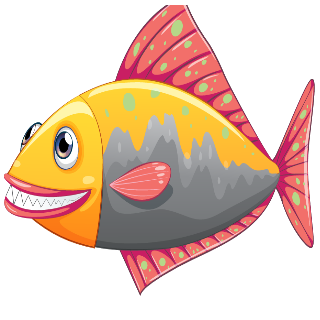

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/pez/p_labio.png :  pez[0.70865434]


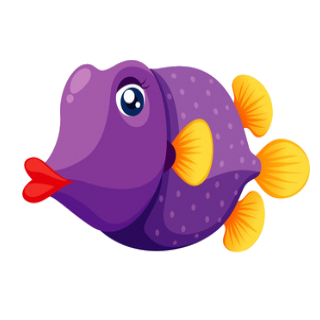

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/pez/p_tiburon.png :  pez[0.4328362]


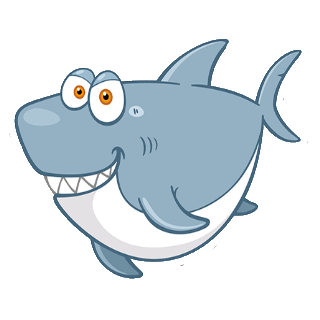

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/pez/da_pez_2_4182977.png :  pez[0.8867644]


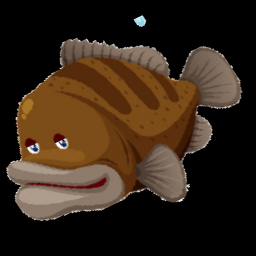

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/pez/da_pez_6_7125240.png :  pez[0.9503408]


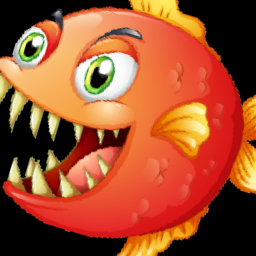

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/pez/da_pez_0_4912310.png :  pez[0.84646064]


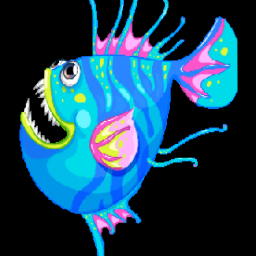

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/pez/da_pez_4_6106090.png :  pez[0.809299]


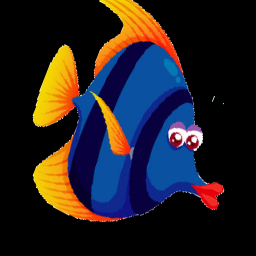

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/pez/da_pez_1_7088261.png :  pez[0.90053993]


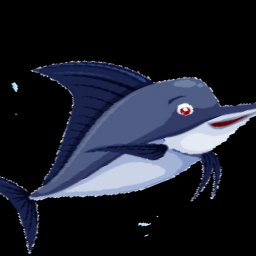

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/pez/da_pez_5_5261662.png :  pez[0.86503625]


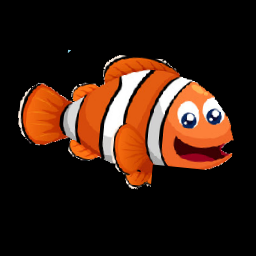

>  gdrive/My Drive/IA/demo ANIMALES//imagenes/test/pez/da_pez_3_3860126.png :  pez[0.93776584]


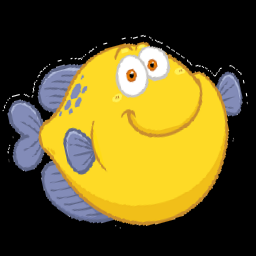


TOTAL CLASS pez :  10 : Detectado OK  10 imágenes - Detectado con Error  0 imágenes.
con una Exactitud de 1.000000

--------------------------------------------------------------------------------------------------------------- 


= TOTAL GENERAL  60 : Detectado OK  60 imágenes - Detectado con Error  0 imágenes.

= Exactitud: 1.000000

= Matriz de Confusión (real / predecido): 
                p:Ave  p:Insecto  p:Invertebrado  p:Mamifero  p:Pez  p:Reptil
r:Ave              10          0               0           0      0         0
r:Insecto           0         10               0           0      0         0
r:Invertebrado      0          0              10           0      0         0
r:Mamifero          0          0               0          10      0         0
r:Pez               0          0               0           0     10         0
r:Reptil            0          0               0           0      0        10

= Reporte de Clasificación: 
              precision    recall  f1-scor

In [9]:
#@title Probar modelo re-entrenado con imágenes de prueba

# define función auxiliar para mostrar resultado de cada imágen 
def testImage(file_name, image_sample, classDesired, showPredictOK):
    result = classifier.predict(image_sample)
    
    # identifica mejor
    bestPos = np.argmax(result, axis=1)
    clasPred = str(all_classes[int(bestPos)]).lower()

    prediction = clasPred + "" + str(result[0][bestPos]) + "" 
    if clasPred == classDesired:
      res = True      
    else:
      res = False
      prediction = prediction + "!"

    # muestra resultados (solo con error)
    if ((not res) or showPredictOK):
      print("> ", file_name,": " , prediction)
      img = Image(file_name, width = "100", height = "80")
      display(img)

    return res, clasPred

# define función auxiliar para mostrar resultado de cada directorio
def testAllClass(classDesired):
  cantOK = 0
  cantNOK = 0
  predict_path =  imagPath + '/' + str(classDesired)
  print("\n")
  y_classReal = []
  y_classRes = []
  for file in os.listdir(predict_path):
      if not file.startswith('.'):
          file = predict_path + "/" + file

          image_sample = image.load_img(file, target_size = IMAGE_SHAPE)
          image_sample = image.img_to_array(image_sample)/255
          image_sample = np.expand_dims(image_sample, axis = 0)
          
          result, clRes = testImage(file, image_sample, classDesired, True)
          if (result):
            cantOK = cantOK + 1
          else:
            cantNOK = cantNOK + 1

          y_classReal.append(classDesired)
          y_classRes.append(clRes)

  print("\nTOTAL CLASS", classDesired,": ", cantOK+cantNOK, ": Detectado OK ", cantOK, "imágenes - Detectado con Error ", cantNOK, "imágenes.")  
  print('con una Exactitud de %f' % accuracy_score(y_classReal, y_classRes))

  return cantOK, cantNOK, y_classReal, y_classRes

# procesa las imágenes de la carpeta <Test>
y_tests = []
y_preds = []
okGral = 0 
NokGral = 0
all_dirs = os.listdir(imagPath)
for each_dir in all_dirs:
  if os.path.isdir(  imagPath + '/' + each_dir):
    print("\n--- Procesando ", each_dir)
    ok, nok, tests, preds = testAllClass(each_dir.lower())
    print("\n--------------------------------------------------------------------------------------------------------------- ")  
    okGral = ok + okGral 
    NokGral = nok + NokGral
    y_tests.extend(tests)
    y_preds.extend(preds)

print("\n===========================================================================================================================")
print("\n= TOTAL GENERAL ", okGral+NokGral, ": Detectado OK ", okGral, "imágenes - Detectado con Error ", NokGral, "imágenes.")

print('\n= Exactitud: %f' % accuracy_score(y_tests, y_preds))
  
print("\n= Matriz de Confusión (real / predecido): ")
cm = confusion_matrix(y_tests, y_preds, labels=[s.lower() for s in all_classes])
cmtx = pd.DataFrame(
    cm, 
    index=['r:{:}'.format(x) for x in all_classes], 
    columns=['p:{:}'.format(x) for x in all_classes]
  )
print(cmtx)

print("\n= Reporte de Clasificación: ")
print(classification_report(y_tests, y_preds))

print("\n===========================================================================================================================")
